In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed


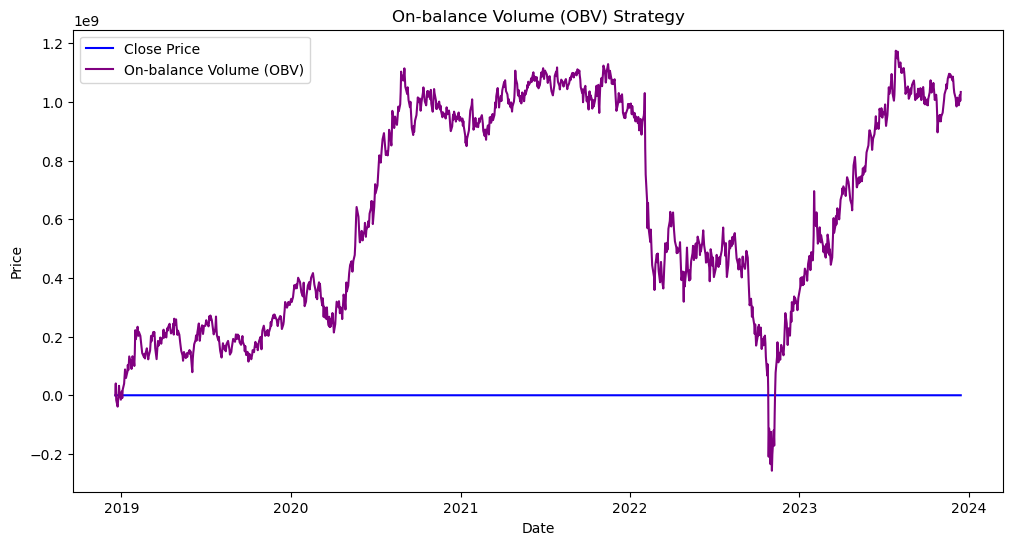

            Signal
Date              
2018-12-19     0.0
2018-12-20     1.0
2018-12-21    -1.0
2018-12-24    -1.0
2018-12-26     1.0
...            ...
2023-12-11    -1.0
2023-12-12     1.0
2023-12-13     1.0
2023-12-14    -1.0
2023-12-15     1.0

[1257 rows x 1 columns]


In [3]:

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_obv(data):
    data['Daily Return'] = data['Close'].pct_change()
    data['Direction'] = data['Daily Return'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    data['OBV'] = data['Volume'] * data['Direction']
    data['OBV'] = data['OBV'].cumsum()
    data.drop(columns=['Daily Return', 'Direction'], inplace=True)
    return data

def plot_obv(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['OBV'], label='On-balance Volume (OBV)', color='purple')
    plt.title('On-balance Volume (OBV) Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def obv_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0

    # Buy Signal
    signals['Signal'][data['OBV'] > data['OBV'].shift(1)] = 1.0

    # Sell Signal
    signals['Signal'][data['OBV'] < data['OBV'].shift(1)] = -1.0

    return signals

if __name__ == "__main__":
    # Define the stock ticker, start date, and end date
    stock_ticker = 'META'
    start_date = '2018-12-19'
    end_date = '2023-12-18'

    # Fetch historical stock data
    stock_data = fetch_data(stock_ticker, start_date, end_date)

    # Calculate On-balance Volume (OBV)
    stock_data = calculate_obv(stock_data)

    # Plot OBV
    plot_obv(stock_data)

    # Generate signals based on OBV
    signals = obv_strategy(stock_data)

    # Print signals
    print(signals)
